In [3]:
import numpy as np
import scipy as sp

### Scipy를 사용한 기초적인 검정
- 이항 검정 (Binomial test)
- 카이 제곱 검정 (Chi-square test) 
- 단일 표본 z-검정 (One-sample z-test) 
- 단일 표본 t-검정 (One-sample t-test)
- 독립 표본 t-검정 (Independent-two-sample t-test)
- 대응 표본 t-검정 (Paired-two-sample t-test)
- 분산 검정 (Chi squared variance test)
- 등분산 검정 (Equal-variance test)
- 정규성 검정 (Normality test)

#### Binomial test

In [4]:
N = 10
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

7

In [6]:
sp.stats.binom_test(n,N)

0.3437499999999999

10번 던져서 7번 앞면이 나오는 경우에서 significance level이 10%라면 유의 확률(p-value)이 34%로 높으므로 theta=1/2이라는 귀무 가설을 기각할 수 없습니다

#### Chi-squre test(goodness of fit)
- 카테고리 분포의 모수 theta(produced by one-hot-encoding)에 대한 가설을 조사하는 검정 방법입니다. 원래 카테고리가 나와야 할 횟수의 기댓값 Mu와 실제 값 x_k의 차이의 제곱을 이용해서 검정 통계량을 구합니다.
- test statistics: sigma (from 1 to K) (x_k - m_k)^2 / m_k

In [7]:
N = 10
K = 4
theta_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K,N,p=theta_0) 
# 1,2,3,4 를 총 10개 뽑는데 , 각각이 뽑힐 확률은 theta_0와 같다. 
n=np.bincount(x,minlength=K)
n

array([0, 3, 5, 2], dtype=int64)

In [8]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

유의 확률(p-value)이 17.8%로 높으므로 귀무 가설을 기각할 수 없다. 따라서  θ0=(0.25,0.25,0.25,0.25) 이다.

#### 단일 표본 z 검정
- One-sample z-test는 scipy에 별도의 함수가 없기 대문에 norm,cdf를 사용한다.

In [10]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [22]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu)/ np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

In [23]:
ztest_1samp(x)

(2.3338341854824276, 0.019604406021683538)

유의 확률(p-value)이 1.96%이므로 만약 유의 수준이 5% 이상 이라면 귀무 가설을 기각할 수 있다. 따라서  μ≠0 이다. 이 경우는 검정 결과가 오류인 예라고 볼 수 있다. 검정 결과가 오류로 나온 이유는 데이터 수가 10개로 부족하기 때문이다.

오류의 유형 중에서 이러한 오류는 귀무 가설이 진실임에도 불구하고 거짓으로 나온 경우로 유형 1 오류(Type 1 Error)라고 한다.

In [55]:
df = pd.DataFrame(columns=['NullTrue','NullFalse'])
df['NullTrue'] = ['Normal','Type1Error']
df['NullFalse'] = ['Type2Error','Normal']
df.index=['TestTrue','TestFalse']
df

,NullTrue,NullFalse
TestTrue,Normal,Type2Error
TestFalse,Type1Error,Normal


#### 단일 표본 t- 검정
- 정규 분포의 표본에 대해 기댓값을 조사하는 검정방법입니다.

<IPython.core.display.Javascript object>


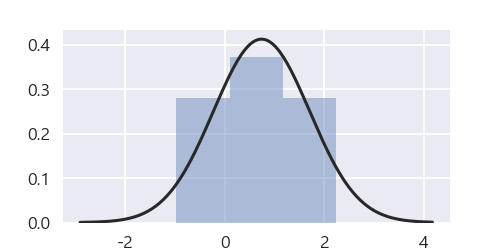

In [48]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
plt.figure(figsize=(4,2))
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

In [44]:
sp.stats.ttest_1samp(x,popmean=0)

Ttest_1sampResult(statistic=2.28943967238967, pvalue=0.04781846490857058)

p-value가 4.78%이므로 significance level이 5% 이상이라면 null이 기각된다. 따라서 Mu!=0이 되는데, 이 경우는 검정 결과가 오류가 된다. 그 이유는 sample data(N)이 작기 때문이다.

<IPython.core.display.Javascript object>


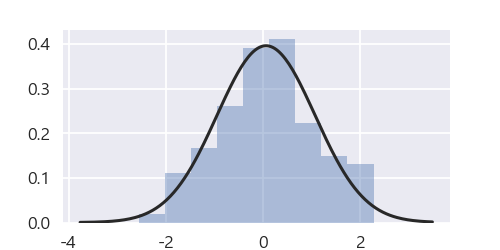

In [47]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
plt.figure(figsize=(4,2))
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

In [49]:
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=2.28943967238967, pvalue=0.04781846490857058)

#### 독립 표본 t 검정
- 두 개의 독립적인 정규 분포에서 나온 두 개의 데이터 셋을 사용하여 두 정규 분포의 기댓값이 동일한지를 검사합니다.

<IPython.core.display.Javascript object>


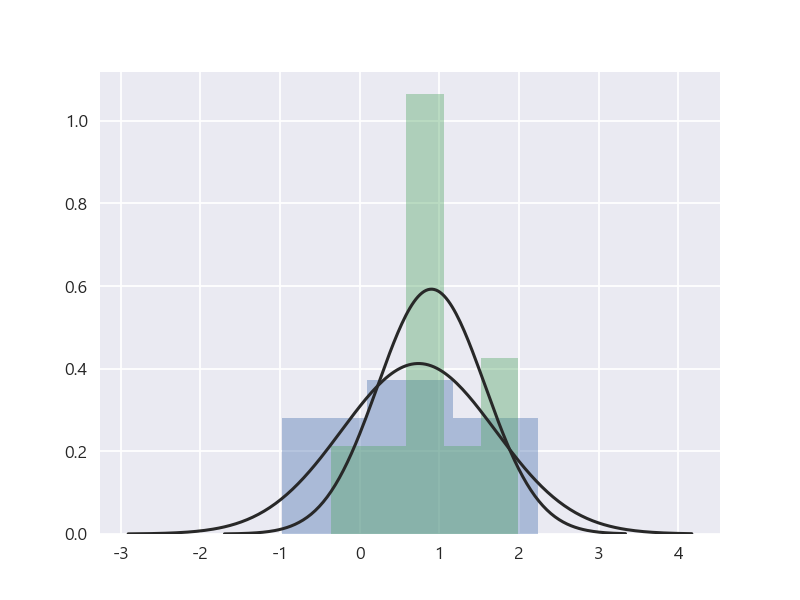

In [50]:
N_1 = 10; mu_1 = 0; sigma_1 = 1
N_2 = 10; mu_2 = 0.5; sigma_2 = 1
# 기댓값이 다릅니다.
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [52]:
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-0.4139968526988655, pvalue=0.6837676894116427)

두 rv간의 Mu가 다른데, p-value가 signifincance level보다 크게 되어서 null이 accpet됩니다. 즉, Null이 틀린데, testing에서 accept되는 오류가 생긴 것입니다. type2error입니다. 이 경우에도 데이터의 크기가 커지면 오류 발생 p 가 줄어들게 됩니다.

In [57]:
df

,NullTrue,NullFalse
TestTrue,Normal,Type2Error
TestFalse,Type1Error,Normal


<IPython.core.display.Javascript object>


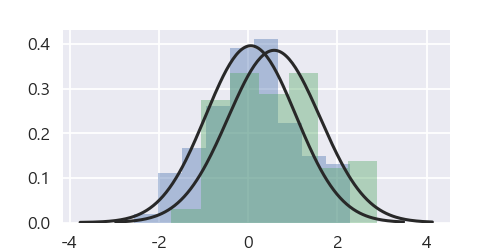

In [61]:
N_1 = 100; mu_1 = 0; sigma_1 = 1
N_2 = 100; mu_2 = 0.5; sigma_2 = 1
# 기댓값이 다릅니다.
np.random.seed(0)
plt.figure(figsize=(4,2))
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
# test statistics
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [59]:
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-3.597192759749613, pvalue=0.0004062796020362524)

#### 대응 표본 t-검정
- 독립 표본 t-검정을 두 집단의 샘플이 1대1 대응하는 경우에 대한 것으로 수정한 것입니다. 
- 독립 표본 t-검정과 마찬가지로 두 정규 분포의 기댓값이 같은지 확인하기 위한 검정입니다.

<IPython.core.display.Javascript object>


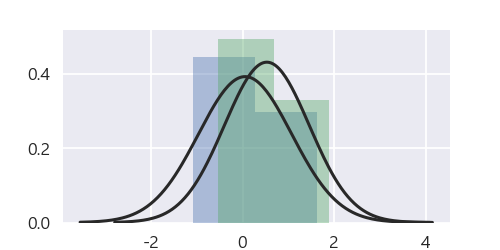

In [64]:
N = 5
mu_1 = 0
mu_2 = 0.5
# 대응 sample의 표본이 다릅니다.
np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)
# paired sample이기 때문에, 기존 분포의 샘플에서 더해줍니다.
plt.figure(figsize=(4,2))
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [65]:
sp.stats.ttest_rel(x1, x2)


Ttest_relResult(statistic=-7.172338066173276, pvalue=0.0020008849290622677)

#### 카이 제곱 분산 검정
- 이제부터는 정규 분포의 분산에 대한 검정을 해보겠습니다.
- 위에서 카테고리 분포에 대한 모수 검정을 할 때 카이 제곱 검정을 사용했습니다.
- 정규 분포의 샘플 분산 값은 정규화하면 chi-square을 따른다는 것을 이용합니다.
- chi2클래스를 사용하여 직접 구현해야 합니다.

In [66]:
def chi2var_test(x, sigma2=1):
    v = x.var(ddof=1)
    t = (len(x) - 1)*v/sigma2
    return t, sp.stats.chi2(df=len(x)-1).sf(np.abs(t))

<IPython.core.display.Javascript object>


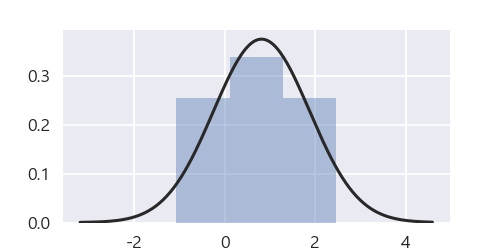

1.0637871321863899

In [68]:
N = 10
mu_0 = 0
sigma_0 = 1.1
np.random.seed(0)
x = sp.stats.norm(mu_0, sigma_0).rvs(N)
plt.figure(figsize=(4,2))
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()
x.std()

#### 등분산 검정
- 두 정규 분포로부터 생성된 두 개의 데이터 집합으로부터 두 정규 분포의 분산 모수가 같은지 확인하기 위한 겁정입니다.
- 기본적으로 F 분포를 사용하지만, 실무에서는 barlett,fligner,levene을 주로 사용합니다.

<IPython.core.display.Javascript object>


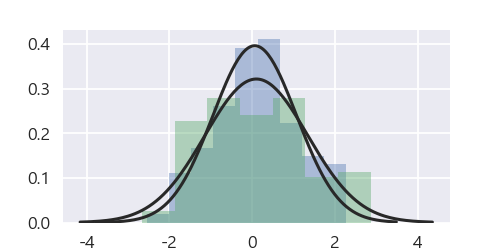

(1.0078822447165796, 1.2416003969261071)

In [71]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2
# 분산이 두 rv에서 다르게 설정됩니다.
np.random.seed(0)
x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)
plt.figure(figsize=(4,2))
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()
x1.std(), x2.std()

In [75]:
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=4.253473837232266, pvalue=0.039170128783651344)

In [73]:
sp.stats.fligner(x1,x2)

FlignerResult(statistic=7.224841990409457, pvalue=0.007190150106748367)

In [74]:
sp.stats.levene(x1,x2)

LeveneResult(statistic=7.680708947679437, pvalue=0.0061135154970207925)

#### 정규성 검정
- 회귀 분석 등에서는 확률 분포가 정규 분포를 따르는지 아닌지를 확인하는 것이 중요합니다. 이러한 검정을 Normality test라고 합니다.